# Predicting the Severity of Road Traffic Accidents in the UK

## Preparation

- Number of words: 1512

- Runtime: 1 hours (*Memory 10 GB, CPU Intel i7-10700 CPU @2.90GHz*)

- Coding environment: SDS Docker

- License: this notebook is made available under the [Creative Commons Attribution license](https://creativecommons.org/licenses/by/4.0/) (or other license that you like).

- Additional library *[libraries not included in SDS Docker or not used in this module]*:
    - **watermark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

## Table of contents

1. [Introduction](#Introduction)

1. [Research questions](#Research-questions)

1. [Data](#Data)

1. [Methodology](#Methodology)

1. [Results and discussion](#Results-and-discussion)

1. [Conclusion](#Conclusion)

1. [References](#References)

## 1. Introduction

[[ go back to the top ]](#Table-of-contents)

### 1.1 Context

Road traffic accidents (RTAs)  have become one of the leading causes of injury and death around world. According to the World Health Organization (2023), around 1.35 million people die each year in road traffic accidents, and over 50 million people are injured. It is estimated that by 2030, road traffic injuries will become the seventh leading cause of death globally (Ahmed et al., 2023). These accidents not only cause devastating impacts on victims but also lead to serious social and economic burdens, including medical costs, loss of productivity, and property damage (Megnidio-Tchoukouegno and Adedeji, 2023). A study by the World Bank (2021) pointed out that reducing road traffic deaths by 10% could increase per capita GDP by up to 3.6%. To address this public health and socio-economic problem, the United Nations put the target of halving the number of global road traffic deaths and injuries by 2020 in the Sustainable Development Goals (SDGs), highlighting the importance of improving road safety.

The problem of road traffic accidents is also serious in the UK. A total of 1,770 people were killed in road traffic accidents between 2017 and 2018, with 26,610 people killed or seriously injured and 165,100 overall casualties (Feng et al., 2020). Since 2012, the progress in reducing road deaths in the UK has slowed significantly. This happened after the publication of the Coalition Government’s Road Safety Framework (DfT, 2011). Currently, the UK has fallen to the fifth worst performer in Europe regarding road safety improvement (ETSC, 2021).

### 1.2 Literature Review

Road traffic accidents usually result from the complex interaction of multiple factors, including human behavior, vehicles, road conditions, and the environment (Tambouratzis et al., 2014). Existing studies mainly focus on human factors such as driver behavior, fatigue driving, and drunk driving (Vinta et al., 2024). However, the role of road infrastructure and environmental factors in accidents and their severity need to receive the same attention.

Accident prediction research has become an important area to identify key factors leading to accidents and to propose effective solutions (Woyessa et al., 2021; Kumar et al., 2021). In recent years, with the rapid development of data collection and management systems, research on accident prediction has also increased. By applying data mining and machine learning technologies, researchers can better understand accident factors and identify various accident patterns (Fakhrahmad et al., 2025). Therefore, predicting accident severity is essential for protecting vulnerable road users and for providing necessary information to prevent accidents.

Many optimization methods have been widely used to predict accident severity and to identify key accident parameters, improving prediction accuracy and efficiency. Tambouratzis et al. (2014) used Probabilistic Neural Networks (PNN) and Random Forest for accident prediction. Both methods achieved an accuracy of up to 96%, significantly better than other classification methods. Moreover, Sumbal et al. (2021) developed a prediction framework using various machine learning algorithms. In tests based on UK data, Random Forest, Decision Trees, and Bagging performed best across all evaluation metrics. Random Forest is also commonly used to rank the importance of accident features, helping to improve model performance by highlighting the most relevant variables (Megnidio-Tchoukouegno and Adedeji, 2023).

### 1.3 Aims

Based on the above background and research progress, this research focuses on predicting the severity of road traffic accidents in the UK, specifically considering road and environmental factors. It uses STATS19 accident data released by the Department for Transport, covering the period from 2019 to 2023. A Random Forest model will be applied to predict accident severity and identify key factors. Due to its excellent performance and feature importance analysis capabilities, Random Forest has been widely and successfully used in traffic accident studies (Tambouratzis et al., 2014). The goal of this research is to provide strong theoretical and empirical support for developing traffic safety policies and management measures, thus helping to improve road safety in the UK.

An overview of packages used to run the analysis:

In [1]:
# Import necessary packages first.

# Packages for data manipulation
import pandas as pd  # DataFrame operations and data processing
import numpy as np  # Numerical operations and handling arrays

# Packages for data visualization
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Statistical data visualization

# Package for XGBoost model
from xgboost import XGBClassifier  # XGBoost classifier for binary classification

# Packages for model building and evaluation (scikit-learn)
from sklearn.model_selection import train_test_split, GridSearchCV  # Data splitting and hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score  # Model evaluation metrics
from sklearn.inspection import permutation_importance  # Feature importance estimation via permutation method

## 2. Research questions

[[ go back to the top ]](#Table-of-contents)

**RQ1** | Is it possible to predict the severity of road traffic accidents in the UK using structured features such as weather, road type, speed limit, and time of day?

**RQ2** | How do ensemble machine learning models, such as Random Forest and XGBoost, compare in their performance when applied to accident severity prediction?

**RQ3** | Which features contribute most to determining whether an accident is classified as severe or slight in the UK context?

## 3. Data

[[ go back to the top ]](#Table-of-contents)

### 3.1 Data Import

The road safety accident data used in this study is provided by the UK Department for Transport (DfT), which has released detailed records of personal injury road collisions in Great Britain since 1979. These also records the types of vehicles involved and the resulting casualties. The statistics only cover collisions that occurred on public roads and were reported to the police using the STATS19 collision reporting form. This study focuses on the latest five-year period (2019–2023) and extracts variables related to road and environmental conditions for analysis.

In [2]:
# Import the road accidents dataset as a dataframe
road_accidents = pd.read_csv('data/dft-road-casualty-statistics-collision-last-5-years.csv', low_memory=False)

In [3]:
# Display basic information about the dataset
road_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520084 entries, 0 to 520083
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               520084 non-null  object 
 1   accident_year                                520084 non-null  int64  
 2   accident_reference                           520084 non-null  object 
 3   location_easting_osgr                        519991 non-null  float64
 4   location_northing_osgr                       519991 non-null  float64
 5   longitude                                    519991 non-null  float64
 6   latitude                                     519991 non-null  float64
 7   police_force                                 520084 non-null  int64  
 8   accident_severity                            520084 non-null  int64  
 9   number_of_vehicles                           520084 non-nul

In [4]:
# Print a few rows of this dataset
road_accidents.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2019010128300,2019,010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,...,1,1,1,0,0,1,3,2,E01004762,-1
1,2019010152270,2019,010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,...,4,1,1,0,0,1,3,2,E01003117,-1
2,2019010155191,2019,010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,...,4,1,1,0,0,1,1,2,E01000943,-1
3,2019010155192,2019,010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,...,4,1,1,0,0,1,1,2,E01000973,-1
4,2019010155194,2019,010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,...,4,1,1,0,0,1,1,2,E01000546,-1


### 3.2 Data Preprocessing

Data preprocessing and cleaning is a critical step in machine learning workflows. Without preprocessing, raw data cannot be directly used to train effective and accurate models (Sumbal et al., 2021). The road accident dataset is provided in CSV format. After downloading and briefly examining each attribute of the dataset, some obvious invalid values were removed, such as fields with “-1”, which indicates missing information in this dataset.

In [5]:
# Extract hour from time and drop the original time column
road_accidents['hour'] = pd.to_datetime(road_accidents['time'], format='%H:%M', errors='coerce').dt.hour
road_accidents = road_accidents.drop(columns=['time'])

In [6]:
# Handle missing values: Replace -1 codes with NaN
missing_value_columns = [
    'day_of_week', 'road_type', 'junction_detail', 'junction_control',
    'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities',
    'light_conditions', 'weather_conditions', 'road_surface_conditions',
    'carriageway_hazards', 'urban_or_rural_area', 'trunk_road_flag'
]

for col in missing_value_columns:
    road_accidents[col] = road_accidents[col].replace(-1, np.nan)

In [7]:
# Select relevant features variable
selected_features = [
    'day_of_week', 'hour', 'road_type', 'speed_limit', 'junction_detail', 'junction_control',
    'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities',
    'light_conditions', 'weather_conditions', 'road_surface_conditions',
    'carriageway_hazards', 'urban_or_rural_area', 'trunk_road_flag'
]

### 3.3 Data Description

| Variable | Description | Type | Coding |
|:---|:---|:---|:---|
| accident_severity | Severity of the accident | Categorical | 1=fatal; 2=serious; 3=Tuesday |
| day_of_week | Day of the week when the accident occurred | Categorical | 1=Sunday; 2=Monday; 3=Tuesday; 4=Wednesday; 5=Thursday; 6=Friday; 7=Saturday |
| hour | Hour of the day when the accident occurred | Numerical | 0-23 |
| road_type | Type of road where the accident occurred | Categorical | 1=Roundabout; 2=One way street; 3=Dual carriageway; 6=Single carriageway; 7=Slip road; 9=Unknown; 12=Other |
| speed_limit | Speed limit at the accident location (mph) | Numerical | Common values: 20, 30, 40, 50, 60, 70 |
| junction_detail | Detail about junction configuration | Categorical | 0=Not at junction or within 20 metres; 1=Roundabout; 2=Mini-roundabout; 3=T or staggered junction; 5=Slip road; 6=Crossroads; 7=More than 4 arms; 8=Private drive or entranceor entrance; 9=Other junction; 99=Unknown |
| junction_control | Control type at the junction | Categorical | 0=Not at junction or within 20 metres; 1=Authorised person; 2=Auto traffic signal; 3=Stop sign; 4=Give way or uncontrolled; 9=Unknown |
| pedestrian_crossing_human_control | Presence of human control at crossing | Categorical | 0=None within 50 metres; 1=School Crossing Patrol; 2=Other authorised person; 9=Unknown |
| pedestrian_crossing_physical_facilities | Physical facilities at pedestrian crossings | Categorical | 0=None within 50 metres; 1=Zebra; 4=Pelican/Puffin/Toucan; 5=Traffic Signal Junction; 7=Footbridge/Subway; 8=Central Refuge; 9=Unknown |
| light_conditions | Lighting conditions during accident | Categorical | 1=Daylight; 4=Darkness - lights lit; 5=Darkness - lights unlit; 6=Darkness - no lighting; 7=Darkness - lighting unknown |
| weather_conditions | Weather conditions at the time of accident | Categorical | 1=Fine; 2=Raining; 3=Snowing; 4=Fine + high winds; 5=Raining + high winds; 6=Snowing + high winds; 7=Fog or mist; 8=Other; 9=Unknown |
| road_surface_conditions | Surface conditions of the road | Categorical | 1=Dry; 2=Wet/damp; 3=Snow; 4=Frost/ice; 5=Flood; 6=Oil or diesel; 7=Mud; 9=Unknown |
| carriageway_hazards | Hazards on the carriageway at accident location | Categorical | 0=None; 1=Vehicle load; 2=Other object; 3=Previous accident; 4=Dog; 5=Other animal; 6=Pedestrian in carriageway; 7=Any animal in carriageway; 9=Unknown |
| urban_or_rural_area | Urban or rural area where the accident occurred | Categorical | 1=Urban; 2=Rural; 3=Unallocated |
| trunk_road_flag | Whether the accident occurred on a trunk road | Categorical | 1=Trunk; 2=Non-trunk |


### 3.4 Data Preparation

To address the class imbalance problem and improve model performance, the original three-category accident severity variable was transformed into a binary classification. Accidents recorded as “fatal” or “serious” were grouped together as “severe”, while those marked as “slight” were classified as “non-severe”. This redefinition helps balance the target classes. After reclassification, the dataset was prepared to randomly split into training and testing subsets, and the distribution of the target variable was visualized to assess the extent of imbalance before modeling.

In [8]:
# Define target variable and convert to binary classification
# 1 = Fatal or Serious → 1 (Severe), 3 = Slight → 0 (Non-severe)
target = 'accident_severity'
y = road_accidents[target]
y = y.replace({1: 1, 2: 1, 3: 0})

In [9]:
# Extract features and labels
X = road_accidents[selected_features]

In [10]:
# Handle missing values
X = X.dropna()
y = y[X.index]

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280639 entries, 0 to 512593
Data columns (total 14 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   day_of_week                              280639 non-null  int64  
 1   hour                                     280639 non-null  int32  
 2   road_type                                280639 non-null  int64  
 3   speed_limit                              280639 non-null  int64  
 4   junction_detail                          280639 non-null  float64
 5   junction_control                         280639 non-null  float64
 6   pedestrian_crossing_human_control        280639 non-null  float64
 7   pedestrian_crossing_physical_facilities  280639 non-null  float64
 8   light_conditions                         280639 non-null  float64
 9   weather_conditions                       280639 non-null  float64
 10  road_surface_conditions              

In [11]:
# Define which columns to convert
categorical_cols = [
    'day_of_week', 'road_type', 'junction_detail', 'junction_control',
    'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities',
    'light_conditions', 'weather_conditions', 'road_surface_conditions',
    'carriageway_hazards', 'urban_or_rural_area', 'trunk_road_flag'
]

# Convert categorical columns back to int
X[categorical_cols] = X[categorical_cols].astype('int64')

In [12]:
# View selected features
X.head()

,day_of_week,hour,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,trunk_road_flag
0,2,17,1,30,1,2,0,5,1,1,1,0,1,2
2,3,1,6,30,3,4,0,0,4,1,1,0,1,2
3,3,1,6,20,3,4,0,0,4,1,1,0,1,2
4,3,0,6,30,6,4,0,0,4,1,1,0,1,2
6,3,1,6,30,6,2,0,5,4,1,1,0,1,2


In [13]:
# Check missing values
X.isna().sum()

day_of_week                                0
hour                                       0
road_type                                  0
speed_limit                                0
junction_detail                            0
junction_control                           0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_conditions                         0
road_surface_conditions                    0
carriageway_hazards                        0
urban_or_rural_area                        0
trunk_road_flag                            0
dtype: int64

Target Variable Distribution (0 = Slight, 1 = Severe):
accident_severity
0    225652
1     54987
Name: count, dtype: int64


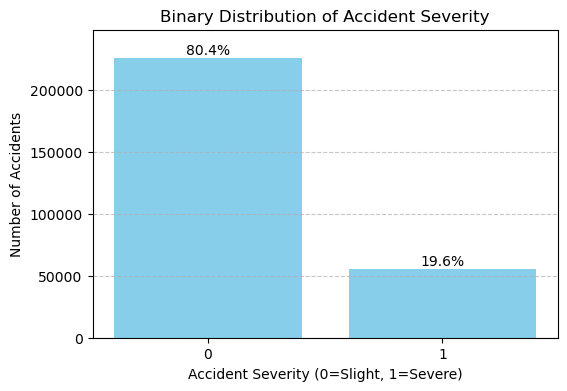

In [14]:
# Check distribution of binary target variable before training
print("Target Variable Distribution (0 = Slight, 1 = Severe):")
print(y.value_counts())

# Plot the distribution of accident severity (binary)
plt.figure(figsize=(6,4))
y_counts = y.value_counts().sort_index()
y_percent = y.value_counts(normalize=True).sort_index()
bars = plt.bar(y_counts.index.astype(str), y_counts.values, color='skyblue')
for bar, pct in zip(bars, y_percent.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f'{pct:.1%}', ha='center', va='bottom', fontsize=10)
plt.xlabel('Accident Severity (0=Slight, 1=Severe)')
plt.ylabel('Number of Accidents')
plt.title('Binary Distribution of Accident Severity')
plt.ylim(0, y_counts.max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4. Methodology

[[ go back to the top ]](#Table-of-contents)

![Flowchart](flowchart.png)

### 4.1	Random Forest

Hyperparameters such as max_depth and min_samples_split were tuned using grid search. The model was trained with class weight balancing to address class imbalance.
The final model was selected based on cross-validation performance and retrained on the full training set before evaluation.

### 4.2	XGBoost

The parameter scale_pos_weight was set based on the class distribution. Other parameters including max_depth, learning_rate, and n_estimators were optimized to improve model performance.
XGBoost was chosen for its ability to capture non-linear relationships and often achieves better performance on imbalanced data.

Model performance was evaluated using accuracy, macro-averaged F1 score, and confusion matrix. These metrics help assess the models' ability to correctly classify severe and non-severe accidents under class imbalance conditions.

### 4.3 Feature Importance Analysis

After training, feature importance scores were extracted from both Random Forest and XGBoost models.
The top 10 most important features were visualized using bar charts, helping to identify which factors are most influential in predicting accident severity.

## 5. Results and discussion

[[ go back to the top ]](#Table-of-contents)

### 5.1 Random Forest

In [16]:
# Split data into random train and test subsets
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=random_state_split, stratify=y)

In [17]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

# check the index of train_x and train_y
print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(210479, 14)
(70160, 14)
(210479,)
(70160,)
True
True


In [18]:
# Sample 50,000 rows from the training set for hyperparameter tuning
sample_size = 50000
train_x_sample = train_x.sample(n=sample_size, random_state=random_state_split)
train_y_sample = train_y.loc[train_x_sample.index]

# Define hyperparameters to tune
hyperparameters = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 4, 6]
}

# Initialize Random Forest Classifier
randomState_dt = 10000
rf = RandomForestClassifier(random_state=randomState_dt)

# Set up GridSearchCV (3-fold CV to speed up)
clf = GridSearchCV(rf, hyperparameters, cv=3)

# Fit GridSearchCV using the sampled data
clf.fit(train_x_sample, train_y_sample)

# Output best parameters and score
print("The best parameter value is:")
print(clf.best_params_)
print("The best score is:")
print(clf.best_score_)

The best parameter value is:
{'max_depth': 10, 'min_samples_split': 2}
The best score is:
0.8020200006416288


In [19]:
# Train the final Random Forest Classifier using best parameters
rf_final = RandomForestClassifier(
    max_depth=10,
    min_samples_split=2,
    class_weight='balanced',
    random_state=randomState_dt
)
rf_final.fit(train_x, train_y)

# Evaluate the final Random Forest model
print("Final Random Forest Performance:")
pred_y_rf = rf_final.predict(test_x)
print(classification_report(test_y, pred_y_rf))

Final Random Forest Performance:
              precision    recall  f1-score   support

           0       0.86      0.43      0.57     56413
           1       0.23      0.71      0.35     13747

    accuracy                           0.48     70160
   macro avg       0.54      0.57      0.46     70160
weighted avg       0.73      0.48      0.53     70160



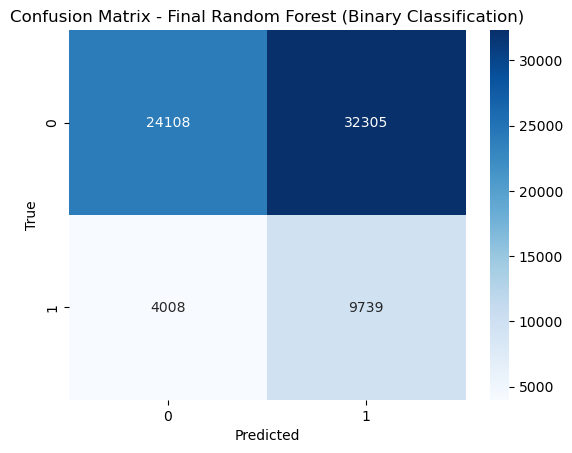

In [20]:
# Plot Confusion Matrix
conf_mat = confusion_matrix(test_y, pred_y_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Final Random Forest (Binary Classification)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The Random Forest model achieved an overall accuracy of 48% and a macro-averaged F1 score of 46% on the test set. While the model showed a high recall (71%) for detecting severe accidents, its precision was low (23%), leading to a high false positive rate. Although it captured more severe cases, its accuracy and class discrimination remained limited.

### 5.2 XGBoost

In [21]:
# XGBoost Hyperparameter Tuning
neg, pos = np.bincount(y)
scale = neg / pos

# values of max_depth and min_samples_split
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 150, 200]
}

randomState_xgb = 125
xgb = XGBClassifier(
    scale_pos_weight=scale,
    eval_metric='logloss',
    random_state=randomState_xgb
)

# Sample 50,000 rows from training set for tuning
sample_size = 50000
train_x_sample = train_x.sample(n=sample_size, random_state=randomState_xgb)
train_y_sample = train_y.loc[train_x_sample.index]

# GridSearch on sampled data
gscv_xgb = GridSearchCV(xgb, param_grid, cv=3)
gscv_xgb.fit(train_x_sample, train_y_sample)

# Output best parameters and score
print("Best parameters found for XGBoost:")
print(gscv_xgb.best_params_)
print("Best cross-validation score:")
print(gscv_xgb.best_score_)

Best parameters found for XGBoost:
{'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 200}
Best cross-validation score:
0.5953801396790978


In [22]:
# Train final XGBoost model with best parameters
xgb_final = XGBClassifier(
    max_depth=8,
    learning_rate=0.2,
    n_estimators=200,
    scale_pos_weight=scale,
    eval_metric='logloss',
    random_state=randomState_xgb
)
xgb_final.fit(train_x, train_y)

# Evaluate XGBoost
print("XGBoost Performance:")
pred_y_xgb = xgb_final.predict(test_x)
print(classification_report(test_y, pred_y_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.84      0.54      0.66     56413
           1       0.24      0.59      0.34     13747

    accuracy                           0.55     70160
   macro avg       0.54      0.56      0.50     70160
weighted avg       0.72      0.55      0.60     70160



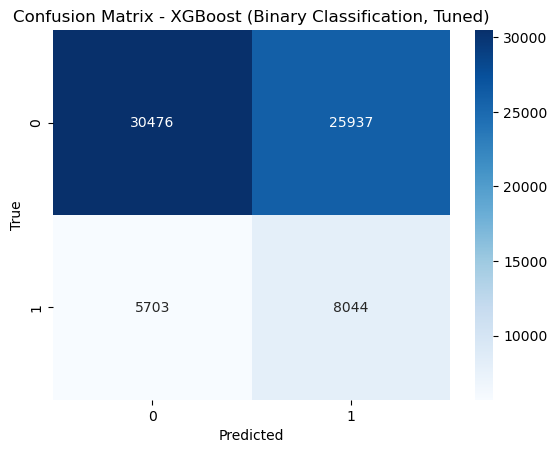

In [23]:
conf_mat_xgb = confusion_matrix(test_y, pred_y_xgb)
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (Binary Classification, Tuned)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The XGBoost model achieved an overall accuracy of 55% and a macro-averaged F1 score of 50%. Compared to Random Forest, XGBoost exhibited higher precision (24%) and a moderate recall (59%) for severe accidents, resulting in a more balanced and robust overall performance.

### 5.3 Feature Importance

In [24]:
# Feature Importance from Random Forest
rf_importance_df = pd.DataFrame({
    'Feature': train_x.columns,
    'Importance': rf_final.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances from Random Forest:")
print(rf_importance_df.head(15))

Feature Importances from Random Forest:
                                    Feature  Importance
6         pedestrian_crossing_human_control    0.159203
4                           junction_detail    0.143548
5                          junction_control    0.124813
7   pedestrian_crossing_physical_facilities    0.107398
2                                 road_type    0.094978
1                                      hour    0.081953
3                               speed_limit    0.062817
12                      urban_or_rural_area    0.059285
8                          light_conditions    0.039232
9                        weather_conditions    0.037076
0                               day_of_week    0.037014
10                  road_surface_conditions    0.026134
11                      carriageway_hazards    0.021398
13                          trunk_road_flag    0.005150


In [25]:
# Feature Importance from XGBoost
xgb_importance_df = pd.DataFrame({
    'Feature': train_x.columns,
    'Importance': xgb_final.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances from XGBoost:")
print(xgb_importance_df.head(15))

Feature Importances from XGBoost:
                                    Feature  Importance
6         pedestrian_crossing_human_control    0.228921
5                          junction_control    0.098625
12                      urban_or_rural_area    0.093895
4                           junction_detail    0.066536
7   pedestrian_crossing_physical_facilities    0.059486
2                                 road_type    0.056046
8                          light_conditions    0.054105
9                        weather_conditions    0.053320
3                               speed_limit    0.052914
1                                      hour    0.050576
10                  road_surface_conditions    0.047822
11                      carriageway_hazards    0.047217
0                               day_of_week    0.046128
13                          trunk_road_flag    0.044408


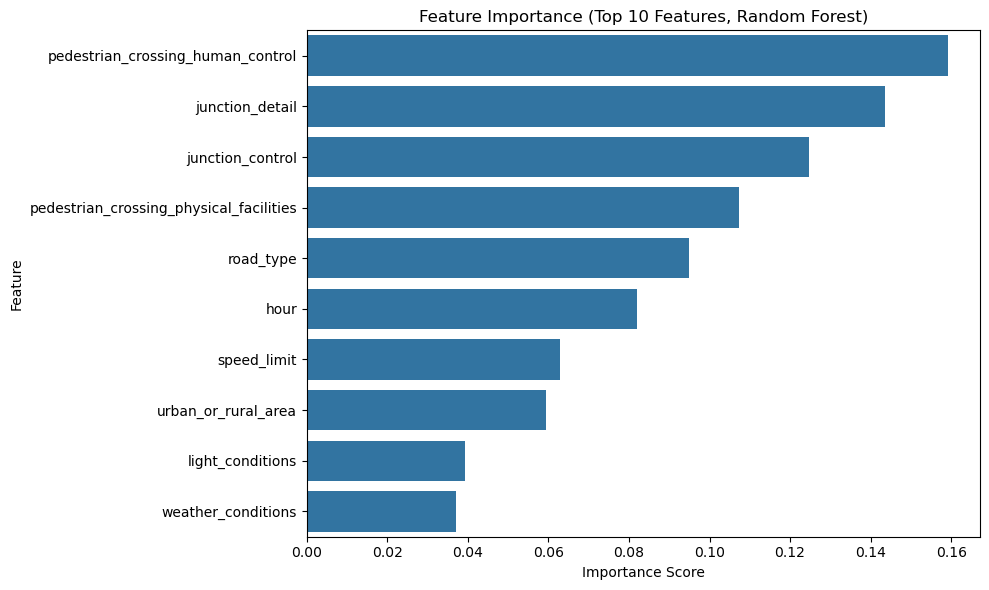

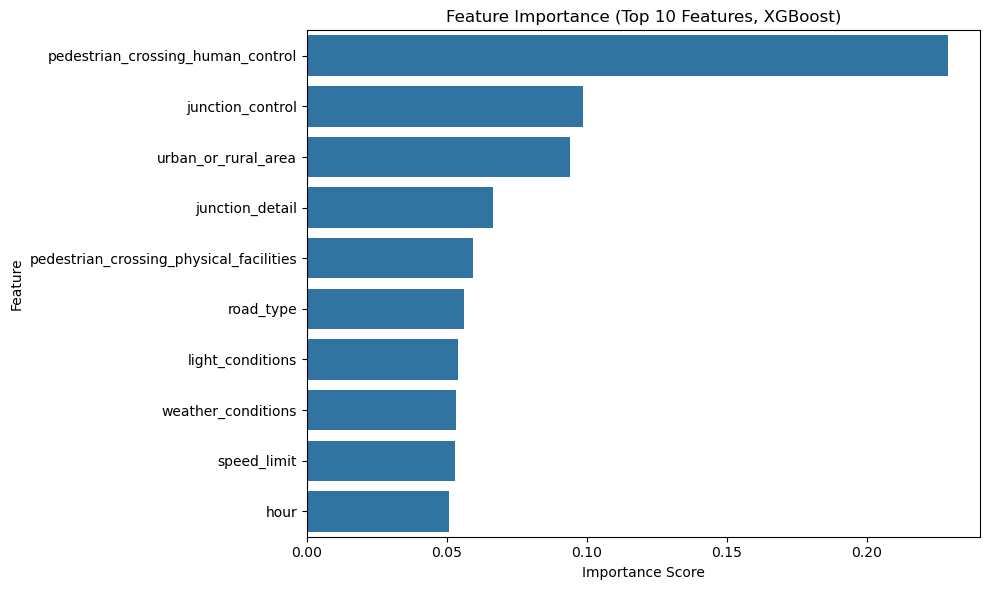

In [26]:
# Plot Random Forest Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance', y='Feature',
    data=rf_importance_df.head(10),
)
plt.title('Feature Importance (Top 10 Features, Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Plot XGBoost Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance', y='Feature',
    data=xgb_importance_df.head(10),
)
plt.title('Feature Importance (Top 10 Features, XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

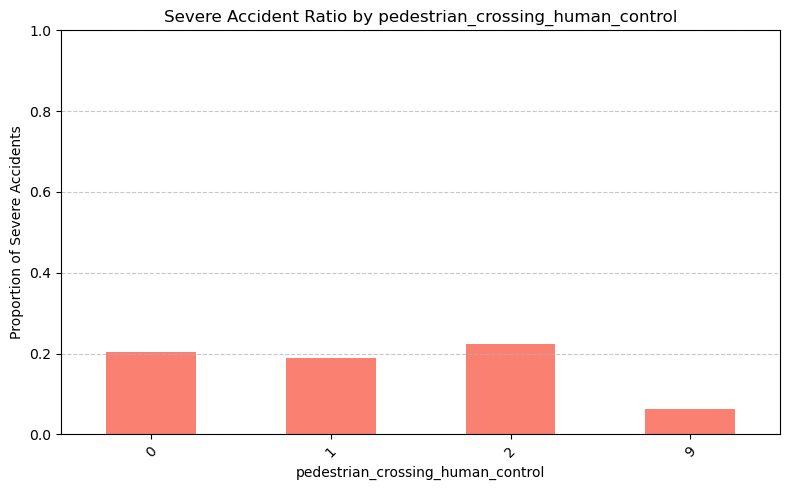

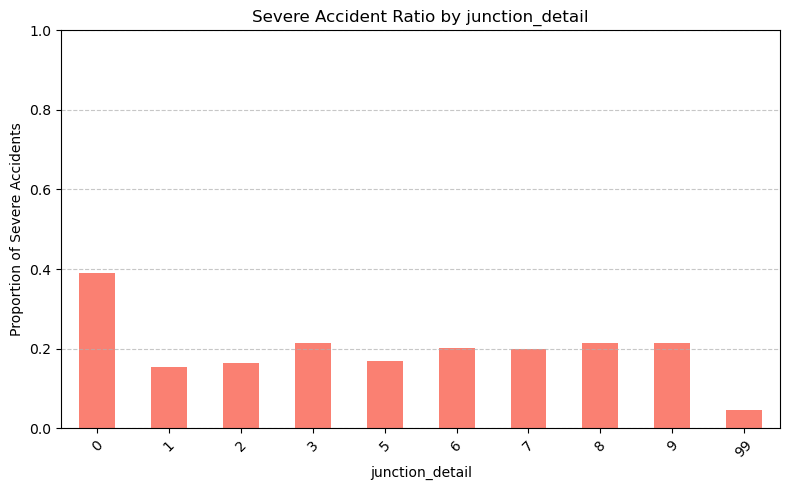

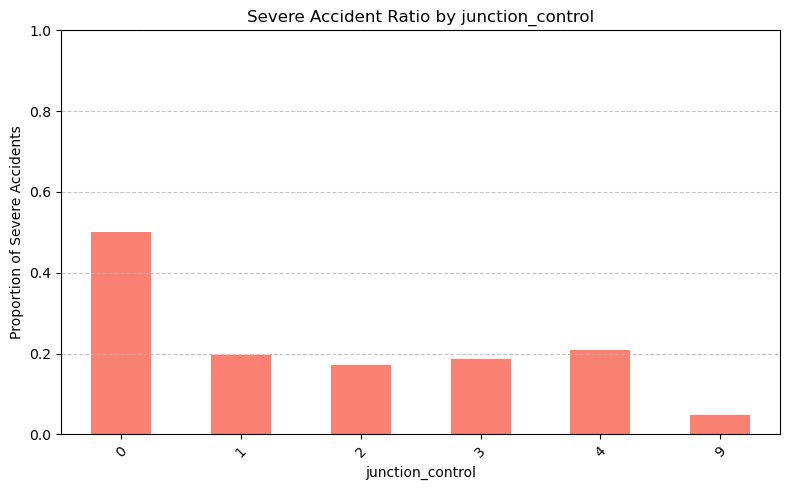

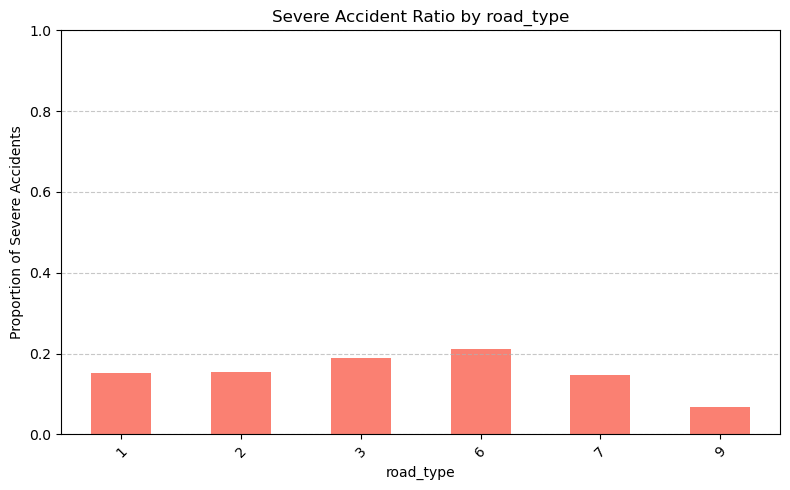

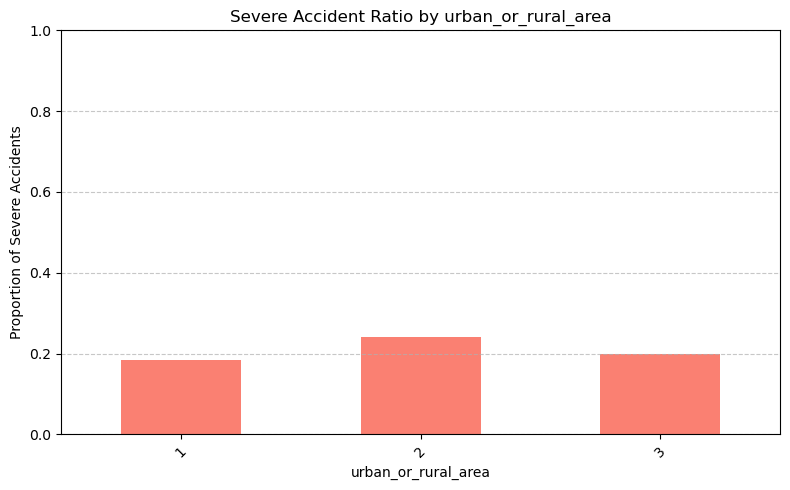

In [27]:
# Make a copy of the feature dataset and add the target variable
X_copy = X.copy()
X_copy['accident_severity'] = y

# Define the list of important features to analyze
important_features = [
    'pedestrian_crossing_human_control',
    'junction_detail',
    'junction_control',
    'road_type',
    'urban_or_rural_area'
]

# Define a function to plot the proportion of severe accidents for each feature
def plot_severity_by_feature(feature_name):
    # Group data by feature and accident severity, then normalize to get proportions
    grouped = X_copy.groupby(feature_name)['accident_severity'].value_counts(normalize=True).unstack().fillna(0)
    grouped.columns = ['Non-Severe (0)', 'Severe (1)']

    # Plot only the proportion of severe accidents
    grouped[['Severe (1)']].plot(
        kind='bar', 
        figsize=(8,5), 
        color='salmon',
        legend=False
    )
    
    # Customize the plot
    plt.title(f'Severe Accident Ratio by {feature_name}')
    plt.ylabel('Proportion of Severe Accidents')
    plt.xlabel(feature_name)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Loop through each important feature and create the corresponding plot
for feature in important_features:
    plot_severity_by_feature(feature)

The feature importance analysis reveals that pedestrian crossing human control, junction detail, junction control, road type, and urban or rural area are the most critical factors influencing accident severity. Severe accidents are more common near pedestrian crossings with human supervision, indicating that such areas may involve frequent pedestrian-vehicle interactions. Complex junctions, including roundabouts and multi-arm intersections, are associated with higher proportions of serious accidents compared to simpler road sections. Similarly, the absence of traffic control measures at junctions increases the risk of severe outcomes. Regarding road types, single carriageways exhibit a notably higher rate of serious accidents than other road forms, highlighting the vulnerability of such roads. Lastly, rural areas show a significantly higher proportion of severe accidents compared to urban areas, potentially due to higher vehicle speeds and longer emergency response times.

## 6. Conclusion

[[ go back to the top ]](#Table-of-contents)

This study aimed to predict the severity of road traffic accidents in the UK and identify key contributing factors using Random Forest and XGBoost models. Both models confirmed that pedestrian crossing control, junction design, and urban-rural differences are strong predictors of accident severity. XGBoost achieved better overall performance than Random Forest, with higher accuracy and a more balanced classification between severe and non-severe accidents. However, despite extensive feature selection and model optimization, improvements were constrained by the severe class imbalance, as serious accidents were much less frequent than slight ones. Future work should incorporate more sophisticated imbalance handling methods or external data sources to further enhance predictive performance and model generalization.

## 7. References

[[ go back to the top ]](#Table-of-contents)

Ahmed, S.K. et al. (2023). Road traffic accidental injuries and deaths: A neglected global health issue. Health Science Reports, 6(5), e1240.

Department for Transport (2011). Strategic framework for road safety. Available at: https://www.gov.uk/government/publications/strategic-framework-for-road-safety [Accessed 19 May 2024].

ETSC (2021). 15th annual road safety performance index report. Available at: https://etsc.eu/15th-annual-road-safety-performance-index-pin-report/ [Accessed 19 May 2024].

Fakhrahmad, M., Ahrar, A. and Hasanzadeh, S. (2025). Investigating various types of factors affecting traffic crashes: Predicting road accidents based on data mining and knowledge acquisition schemes. Iranian Journal of Science and Technology, Transactions of Electrical Engineering, 49, pp. 457–469.

Feng, M., Zheng, J., Ren, J. and Liu, Y. (2020). Towards big data analytics and mining for UK traffic accident analysis, visualization and prediction. Proceedings of the 12th International Conference on Machine Learning and Computing (ICMLC), ACM, pp. 225–229.

Megnidio-Tchoukouegno, M. and Adedeji, J.A. (2023). Machine learning for road traffic accident improvement and environmental resource management in the transportation sector. Sustainability, 15(3), 2014.

Tambouratzis, T., Souliou, D., Chalikias, M. and Gregoriades, A. (2014). Maximising accuracy and efficiency of traffic accident prediction combining information mining with computational intelligence approaches and decision trees. Journal of Artificial Intelligence and Soft Computing Research, 4(1), pp. 31–42.

Vinta, S.R., Rajarajeswari, P., Kumar, M.V. and Kumar, G.S.C. (2024). BConvLSTM: A deep learning-based technique for severity prediction of a traffic crash. International Journal of Crashworthiness, 29(6), pp. 1051–1061.

WHO (2023). Global status report on road safety. World Health Organization, Geneva.

World Bank (2021). Road safety interventions: What works and what does not. Global Road Safety Facility, World Bank, Washington D.C.